# Welcome to the NY State Rabies Dataset!

#### We are going to interact with data from Rabies submissions from NY Public Health! Our goal is to create a predictive classifcation model by selecting a strong correlation from the feature pairs.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [2]:
import os
os.getcwd()

'c:\\Users\\agunb\\Downloads'

In [3]:
#Load the CSV file
df = pd.read_csv("Rabies_NY_State_2007_2025.csv")

#Look at the first rows
print(df.head())

   Received Year  Received Month Report Date County Name  \
0           2008              10   10/1/2008       Essex   
1           2010               6    6/1/2010      Orange   
2           2017              12   12/1/2017   Schoharie   
3           2024               3    3/1/2024       Wayne   
4           2020               9    9/1/2020    Saratoga   

  Animal Classification  Number of Samples  Positive Samples  \
0               Raccoon                  1                 0   
1                   Cat                  4                 1   
2                   Bat                  1                 0   
3               Raccoon                  1                 1   
4                   Cat                  2                 0   

   Latitude Center Point  Longitude Center Point                     Geocode  
0               44.21634               -73.59043  POINT (-73.59043 44.21634)  
1               41.40219               -74.32410   POINT (-74.3241 41.40219)  
2               4

In [4]:
df.shape

(34758, 10)

In [5]:
#Rename some columns
df=df.rename(columns={"County Name":"County","Animal Classification": "Species", "Number of Samples":"Sample Size", "Report Date":"Date"})
print(df.columns)

Index(['Received Year', 'Received Month', 'Date', 'County', 'Species',
       'Sample Size', 'Positive Samples', 'Latitude Center Point',
       'Longitude Center Point', 'Geocode'],
      dtype='object')


In [6]:
#Drop some columns
df= df.drop(columns=[ "Geocode", "Received Year","Received Month"])

In [7]:
#Convert Dates into proper format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
print(df.head())

        Date     County  Species  Sample Size  Positive Samples  \
0 2008-10-01      Essex  Raccoon            1                 0   
1 2010-06-01     Orange      Cat            4                 1   
2 2017-12-01  Schoharie      Bat            1                 0   
3 2024-03-01      Wayne  Raccoon            1                 1   
4 2020-09-01   Saratoga      Cat            2                 0   

   Latitude Center Point  Longitude Center Point  
0               44.21634               -73.59043  
1               41.40219               -74.32410  
2               42.66587               -74.30988  
3               43.06169               -76.99171  
4               43.01060               -73.84956  


In [8]:
#We check the data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34758 entries, 0 to 34757
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    34758 non-null  datetime64[ns]
 1   County                  34758 non-null  object        
 2   Species                 34758 non-null  object        
 3   Sample Size             34758 non-null  int64         
 4   Positive Samples        34758 non-null  int64         
 5   Latitude Center Point   34758 non-null  float64       
 6   Longitude Center Point  34758 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 1.9+ MB


In [9]:
#We look at the statistical summary of the dataset
df.describe(include='all')

,Date,County,Species,Sample Size,Positive Samples,Latitude Center Point,Longitude Center Point
count,34758,34758,34758,34758.000000,34758.000000,34758.000000,34758.000000
unique,NaN,57,10,NaN,NaN,NaN,NaN
top,NaN,Erie,Bat,NaN,NaN,NaN,NaN
freq,NaN,1375,7484,NaN,NaN,NaN,NaN
mean,2016-05-05 18:51:45.955463424,NaN,NaN,3.155561,0.180707,42.667124,-75.544132
min,2007-05-01 00:00:00,NaN,NaN,1.000000,0.000000,40.746070,-79.501690
25%,2011-12-01 00:00:00,NaN,NaN,1.000000,0.000000,42.249420,-76.875560
50%,2016-05-01 00:00:00,NaN,NaN,1.000000,0.000000,42.740220,-75.230000
75%,2020-08-01 00:00:00,NaN,NaN,3.000000,0.000000,43.061690,-73.794900
max,2025-03-01 00:00:00,NaN,NaN,366.000000,9.000000,44.848880,-72.662140


In [10]:
#Check for missing values
df.isnull().sum()

Date                      0
County                    0
Species                   0
Sample Size               0
Positive Samples          0
Latitude Center Point     0
Longitude Center Point    0
dtype: int64

In [11]:
#We look at the counts of each species
df[ 'Species'].value_counts()

Species
Bat               7484
Cat               7224
Dog               5340
Raccoon           4404
Wild Other        2940
Skunk             1945
Rodents           1637
Fox               1614
Domestic Other    1237
Cattle             933
Name: count, dtype: int64

In [12]:
#We look at the counts of each county
df['County'].value_counts()

County
Erie            1375
Albany          1198
Westchester     1107
Onondaga         993
Tompkins         937
Saratoga         922
Niagara          888
Suffolk          844
Jefferson        823
St. Lawrence     818
Orange           818
Ulster           816
Nassau           793
Rensselaer       790
Clinton          768
Monroe           757
Oswego           757
Oneida           752
Dutchess         747
Cayuga           735
Columbia         699
Broome           681
Steuben          665
Schenectady      623
Cattaraugus      620
Washington       582
Ontario          574
Putnam           533
Tioga            528
Wayne            524
Chenango         520
Rockland         518
Otsego           510
Chemung          505
Orleans          503
Lewis            502
Herkimer         497
Essex            490
Franklin         481
Chautauqua       473
Madison          468
Schoharie        462
Livingston       441
Warren           433
Genesee          428
Allegany         423
Wyoming          417
Cortla

In [13]:
#Analyze infection counts
total_infection=df['Positive Samples'].sum()
#Distribution of infection counts
distribution = df['Positive Samples'].value_counts().sort_index()
print("Distribution:\n",distribution)
print("Total infections:", total_infection)

Distribution:
 Positive Samples
0    29674
1     4262
2      596
3      142
4       47
5       21
6        9
7        4
8        1
9        2
Name: count, dtype: int64
Total infections: 6281


In [14]:
county_summary = df.groupby('County')['Positive Samples'].agg( total_infections='sum', average_infections='mean', max_infections='max').reset_index()
print("Infection counts by County:\n", county_summary)

Infection counts by County:
           County  total_infections  average_infections  max_infections
0         Albany               352            0.293823               9
1       Allegany                79            0.186761               3
2         Broome                87            0.127753               2
3    Cattaraugus                95            0.153226               3
4         Cayuga               194            0.263946               3
5     Chautauqua                51            0.107822               2
6        Chemung                91            0.180198               2
7       Chenango                99            0.190385               4
8        Clinton                36            0.046875               2
9       Columbia               148            0.211731               5
10      Cortland                60            0.148883               2
11      Delaware                43            0.115903               2
12      Dutchess               128            0.

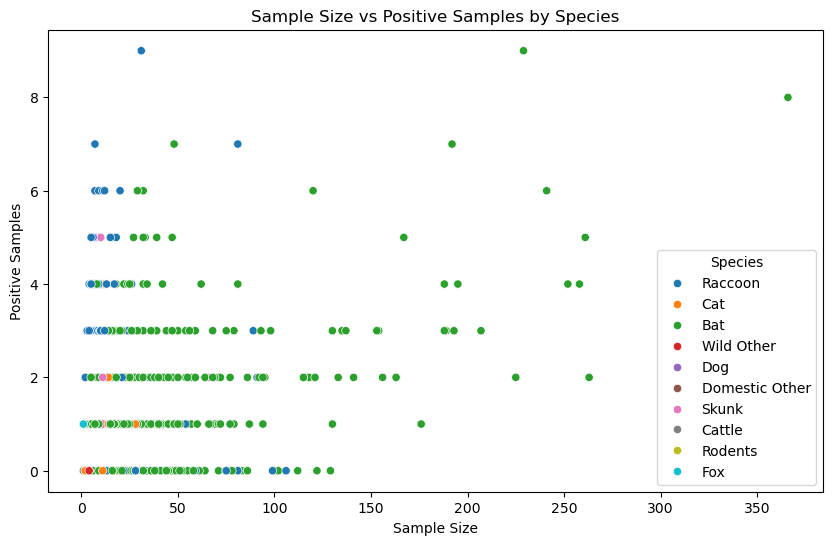

In [15]:
#scatter plot of Sample Size vs Positive Samples by Species
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Sample Size', y='Positive Samples', hue='Species')
plt.title('Sample Size vs Positive Samples by Species')
plt.show()

Text(0.5, 1.0, 'Positive Samples by County')

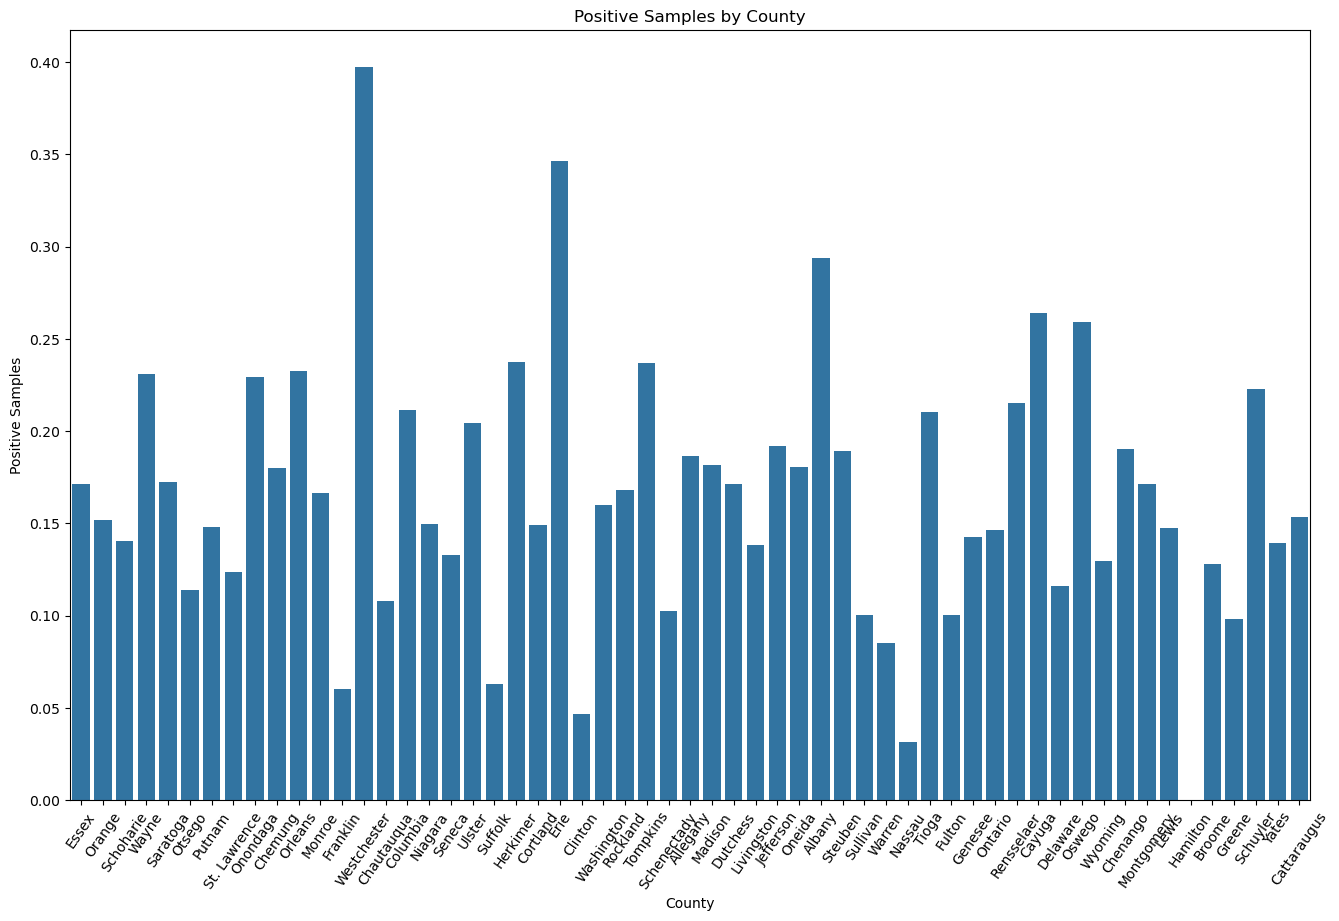

In [16]:
#Bar plot of Positive Samples by County
plt.figure(figsize=(16,10))
sns.barplot(data=df, x='County', y='Positive Samples', errorbar=None)
plt.xticks(rotation=55)
plt.title('Positive Samples by County')

In [17]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
#Define features and target variable


In [18]:
df['Positivity Rate'] = df['Positive Samples'] / df['Sample Size']
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Day"] = df["Date"].dt.day
df["DayOfWeek"] = df["Date"].dt.dayofweek

df['Season'] = pd.cut(df['Date'].dt.month, bins=[0,3,6,9,12], labels=['Winter','Spring','Summer','Fall'], include_lowest=True)

numeric_features = ['Sample Size', 'Positivity Rate', 'Month', 'Year', 'DayOfWeek']
categorical_features = ['Species', 'County', 'Season']

#---PreprocessinG PIPELINE---
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])
#---END PreprocessinG PIPELINE---

In [19]:
from sklearn.linear_model import LogisticRegression
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression())])
#--Train Test Split--
X = df[numeric_features + categorical_features]
y = (df['Positive Samples'] > 0).astype(int)  #Binary target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
#Fit the model
clf.fit(X_train, y_train)

print('Training accuracy:', clf.score(X_train, y_train))
print('Test accuracy:', clf.score(X_test, y_test))

Training accuracy: 0.9982018269438251
Test accuracy: 0.9985615650172612


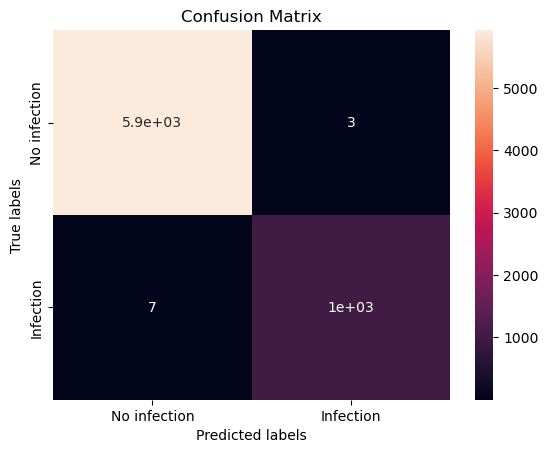

In [21]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['No infection', 'Infection']); ax.yaxis.set_ticklabels(['No infection', 'Infection']) 
    plt.show() 
    
plot_confusion_matrix(y_test, clf.predict(X_test))
#Shows whether model is correctly predicting both classes (positive and negative samples)

We can see that the model that was developed worked quite well and was accurate on both the training and testing data. There are 7 false negatives based on this regression model so in reality we would have to conduct another model experiment such as KNN or SVM for comparison

In [22]:
#Export to Excel
df.to_excel("Rabies_NYState_clean.xlsx", index= False)